<a href="https://colab.research.google.com/github/AnIsAsPe/ElementosEstadisticaMachineLearningPython/blob/master/Variables_aleatorias_discretas%2C_ley_de_los_grandes_n%C3%BAmeros%2C_dependencia_independencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerías y funciones

In [35]:
import numpy as np
import itertools 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

####burbujas_espacio_probabilidad()



In [36]:
def burbujas_espacio_probabilidad(elementos, probabilidad):
  '''
  Función que muestra grafico de burbuja de un espacio de probabilidad de una
  variable aleatoria discreta

  elementos: lista, vector o serie que contiene los posibles elementos
  probabilidad: lista, vector o serie que contiene la probabilidad de cada 
                elemento
  nombre_var: objeto de texto con el nombre de la variable aleatoria
  '''

  
  n = len(elementos)
  X = np.random.randint(1, 8000,n)
  Y = np.random.randint(1, 8000,n)
  P = np.array(probabilidad)
  color = np.random.rand(n)
  titulo = 'Espacio de probabilidad' 
  plt.scatter(x=X, y=Y, s=P*10000,
              c = color, alpha=0.5)
  margen =2500
  plt.xlim(min(X)-margen, max(X)+margen)
  plt.ylim(min(X)-margen,max(X)+margen)
  plt.title(titulo)

  #Mostrar valores de los elementos y sus probabilidades
  for e, p, x, y in zip(elementos,P,X,Y):
    plt.annotate("{}".format(e), 
                 xy=(x, y), 
                 ha="center", va="center")
    #plt.annotate(e ,xy=(x, y), xytext=(0,np.sqrt(p*10000)/2.+5), 
     #            textcoords="offset points", ha="center", va="bottom")

  #Eliminar texto y marcas de los ejes
  ax = plt.gca( )
  ax.axes.xaxis.set_ticks([])
  ax.axes.yaxis.set_ticks([])
  plt.show()

####prueba_independencia()

In [37]:
def prueba_independencia(pA, pB, pAnB):
  return round(pA*pB,2) == round(pAnB,2)


#### probabilidad_condicional()

In [38]:
def probabilidad_condicional(pA, pB, pAnB):
  pA_B = round(pAnB / pB, 2)
  pB_A = round(pAnB / pA, 2)
  print('P(A):', round(pA,2))
  print('P(B):', round(pB,2))
  print('P(A|B):', pA_B)
  print('P(B|A):', pB_A)
  return pA_B, pB_A

# Resultado al lanzar un dado

## Espacio de probabilidad

In [39]:
W = [1, 2, 3, 4, 5, 6]   #omega
P = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]        

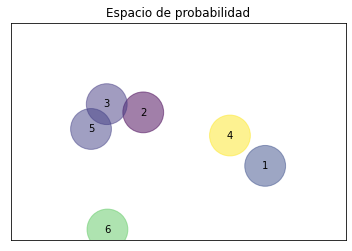

In [40]:
np.random.seed(15)
burbujas_espacio_probabilidad(W, P)

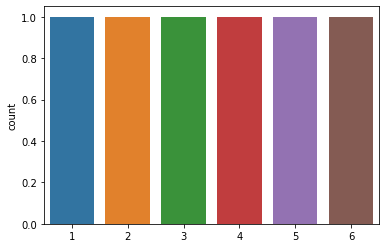

In [41]:
sns.countplot(x = W)
plt.show()

## Esperanza matemática y varianza de la distribución de probabilidad (Ley de probabilidad)

In [42]:
esperanza = 0
for elemento, probabilidad in zip(W, P):
  esperanza += elemento * probabilidad
print('la esperanza matemática de lanzar un dado es:', esperanza)

la esperanza matemática de lanzar un dado es: 3.5


¿Qué quiere decir?


In [45]:
varianza = 0
for elemento, probabilidad in zip(W, P):
  varianza += ((elemento-esperanza)**2)*probabilidad
varianza

2.9166666666666665

## Esperanza matemática y varianza de la distribución empírica 

Tirar n número de veces el dado y obtener la media y la varianza

media: 3.29
varianza: 2.1258999999999997




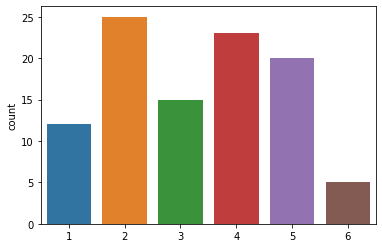

In [51]:
n=100

dado1 = []
for i in range(n):
  tiro_d1 = np.random.choice(W)
  dado1.append(tiro_d1)

media =sum(dado1)/n
varianza = sum([(x-media)**2 for x in dado1])/n

print('media: {}\nvarianza: {}\n\n'.format(media, varianza))

sns.countplot(x = dado1)
plt.show()

### Ejercicio 1

a) Calcular la esperanza matemática y la varianza de un jugador al tirar un dado, de acuerdo a la siguiente regla:
 - gana \$5 dolares si  tirar obtiene un 1, 2 o 3
 - gana \$10 dólares si  tirar obtiene un 4 o 5
 - pierde \$25 dólares si al tirar obtiene un 6

b) Calcular la media y la varianza empirica al simular que un jugador juega 10, 100 y 1000 y 10000 mil veces. 

c) Explicar las diferencias entre la esperanza y varianza calculadas en el punto (a) y los cálculos de la media y varianza empirica del punto (b)



# Lanzar dos dados 

## Ley de probabilidad de las combinaciones al tirar dos dados

In [52]:
dado = [1, 2, 3, 4, 5, 6] 

#obtener las 36 combinaciones
combinaciones = list(itertools.product(dado, repeat=2))
probabilidades = list(itertools.repeat(1/36,36))

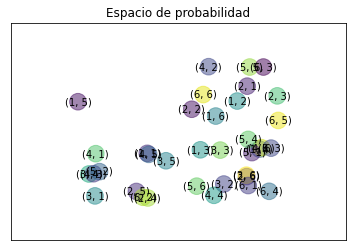

In [53]:
np.random.seed(22)
burbujas_espacio_probabilidad(combinaciones, probabilidades)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


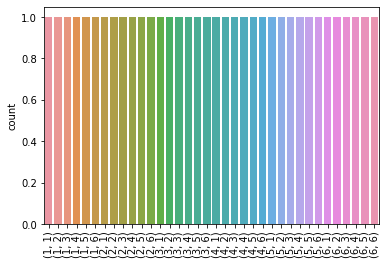

In [54]:
grafica = sns.countplot([str(i) for i in combinaciones])
grafica.set_xticklabels(grafica.get_xticklabels(), rotation=90)

plt.show()

## Ley de probabilidad de la suma de dos dados

In [55]:
dos_dados = pd.DataFrame(combinaciones)
dos_dados.columns = ['dado1', 'dado2']
dos_dados['suma'] = dos_dados['dado1'] + dos_dados['dado2']
dos_dados['probabilidad']= probabilidades

In [89]:
Ley_P_suma = pd.DataFrame(dos_dados['suma'].value_counts(sort=False, 
                                                         normalize=True))

Ley_P_suma.reset_index(inplace=True)
Ley_P_suma.columns=['elementos', 'probabilidad']

Ley_P_suma

,elementos,probabilidad
0,2,0.027778
1,3,0.055556
2,4,0.083333
3,5,0.111111
4,6,0.138889
5,7,0.166667
6,8,0.138889
7,9,0.111111
8,10,0.083333
9,11,0.055556


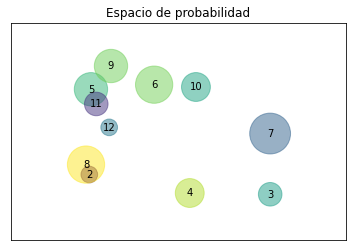

In [91]:
np.random.seed(10)   
burbujas_espacio_probabilidad(Ley_P_suma['elementos'],
                              Ley_P_suma['probabilidad'])

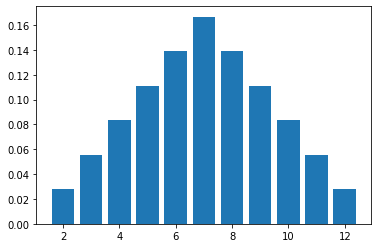

In [95]:
plt.bar(Ley_P_suma['elementos'], Ley_P_suma['probabilidad'] )
plt.show()

## ¿Eventos dependientes o independientes?

1. - A : obtener 1 en el primer lanzamiento, 
   - B : obtener 2 en el segundo
2. - A : obtener 1 en primer lanzamiento 
   - B : que la suma sea mayor a 6
3. - A : obtener un número primo repetido
   - B : obtener un número par repetido



- **Ejemplo 1**

  - A : obtener 1 en el primer lanzamiento,
  - B : obtener 2 en el segundo

In [59]:
A = dos_dados['dado1'] == 1 
B = dos_dados['dado2'] == 2

p_A = dos_dados[A]['probabilidad'].sum()
p_B = dos_dados[B]['probabilidad'].sum()
p_AnB = dos_dados[A & B]['probabilidad'].sum()

In [60]:
prueba_independencia(p_A, p_B, p_AnB)

True

In [61]:
pA_B, pB_A = probabilidad_condicional(p_A, p_B, p_AnB)

P(A): 0.17
P(B): 0.17
P(A|B): 0.17
P(B|A): 0.17


- **Ejemplo 2**
  - A : obtener 1 en primer lanzamiento 
  - B : que la suma sea mayor a 6

In [62]:
A = dos_dados['dado1'] == 1
B = dos_dados['suma'] > 6

p_A = dos_dados[A]['probabilidad'].sum()
p_B = dos_dados[B]['probabilidad'].sum()
p_AnB = dos_dados[A & B]['probabilidad'].sum()

In [63]:
prueba_independencia(p_A, p_B, p_AnB)

False

In [64]:
pA_B, pB_A = probabilidad_condicional(p_A, p_B, p_AnB)


P(A): 0.17
P(B): 0.58
P(A|B): 0.05
P(B|A): 0.17


- **Ejemplo 3**
  - A : obtener un número primo repetido
  - B : obtener un número par repetido

In [65]:
primos = (2, 3, 5)
A = ((dos_dados['dado1'] == 2)|
     (dos_dados['dado1'] == 3)|
     (dos_dados['dado1'] == 5)) & (dos_dados['dado1']==dos_dados['dado2'])
B = ((dos_dados['dado1'] == 2)|
     (dos_dados['dado1'] == 4)|
     (dos_dados['dado1'] == 6)) & (dos_dados['dado1']==dos_dados['dado2'])

p_A = dos_dados[A]['probabilidad'].sum()
p_B = dos_dados[B]['probabilidad'].sum()
p_AnB = dos_dados[A & B]['probabilidad'].sum()

In [66]:
prueba_independencia(p_A, p_B, p_AnB)

False

In [67]:
pA_B, pB_A = probabilidad_condicional(p_A, p_B, p_AnB)

P(A): 0.08
P(B): 0.08
P(A|B): 0.33
P(B|A): 0.33


## Esperanza matemática y varianza de la variable aleatoria: Suma al lanzar dos dados




In [96]:
Ley_P_suma


,elementos,probabilidad
0,2,0.027778
1,3,0.055556
2,4,0.083333
3,5,0.111111
4,6,0.138889
5,7,0.166667
6,8,0.138889
7,9,0.111111
8,10,0.083333
9,11,0.055556


In [107]:

esperanza = (Ley_P_suma['elementos'] * Ley_P_suma['probabilidad']).sum()
round(esperanza,2)


7.0

In [108]:
varianza = (((Ley_P_suma['elementos']-esperanza)**2)*Ley_P_suma['probabilidad']).sum()
round(varianza,2)

5.83

## Media muestral

media: 6.96
varianza: 5.88




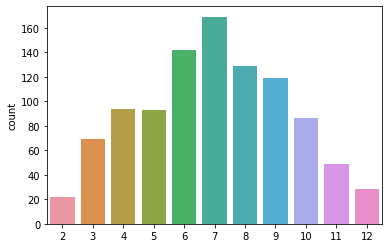

In [112]:
n =1000
X = [1,2,3,4,5,6]

dado1 = []  
dado2 = []   
suma = []    #variable aleatoria ¿distribución?

for _ in range (n):
  tiro_d1 = np.random.choice(X)
  tiro_d2 = np.random.choice(X)

  dado1.append(tiro_d1)
  dado2.append(tiro_d2)
  suma.append(tiro_d1 + tiro_d2)

media =sum(suma)/n
varianza = sum([(x-media)**2 for x in suma])/n

print('media: {:.2f}\nvarianza: {:.2f}\n\n'.format(media, varianza))

sns.countplot(x = suma)
plt.show()


# Caracteres en el libro 100 años de soledad


In [153]:
#from google.colab import files  #para importar archivos a cloab
#files.upload()

Saving Ley_Probabilidad_caraceres_100años.csv to Ley_Probabilidad_caraceres_100años (1).csv


{'Ley_Probabilidad_caraceres_100años.csv': b'caracter,probabilidad\n ,0.17471943953713218\na,0.11183314688358956\nb,0.014382362022971284\nc,0.03363561814417543\nd,0.04316353751689437\ne,0.10426421531655117\nf,0.0051594271858912385\ng,0.008021979134501978\nh,0.007220920167450431\ni,0.05230548061007031\nj,0.0038319218834630044\nk,2.9106407965538012e-05\nl,0.049421415229485045\nm,0.021510900982531094\nn,0.05937833774569605\no,0.07845695541910697\np,0.020940162287206847\nq,0.00856740790985619\nr,0.056789132932761666\ns,0.0581938334910985\nt,0.031751294602406464\nu,0.037192927395963575\nv,0.008704081477694367\nw,3.290289596104297e-05\nx,0.0008377583510080941\ny,0.006446436616367419\nz,0.0032092978522001913\n'}

In [154]:
Ley_P_letras = pd.read_csv('Ley_Probabilidad_caraceres_100años.csv')
Ley_P_letras

,caracter,probabilidad
0,,0.174719
1,a,0.111833
2,b,0.014382
3,c,0.033636
4,d,0.043164
5,e,0.104264
6,f,0.005159
7,g,0.008022
8,h,0.007221
9,i,0.052305


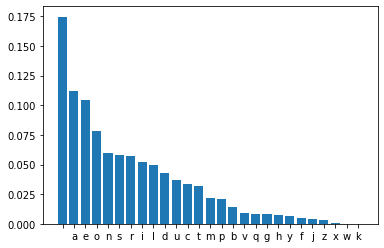

In [155]:
Ley_P_letras=Ley_P_letras.sort_values('probabilidad', ascending=False)
plt.bar(Ley_P_letras['caracter'], Ley_P_letras['probabilidad'] )
plt.show()

##  Ley de Probabilidad del tipo de caracteres en 100 años de soledad

In [162]:
caracteres = sorted(list(Ley_P_letras['caracter']))
vocales = list('aeiou')
espacio = [' ']

consonantes = []
for c in caracteres:
  if c not in (vocales + espacio):
    consonantes += c 

In [172]:
Ley_P_letras['tipo']=np.nan
Ley_P_letras['tipo']=np.where(Ley_P_letras['caracter'].isin(vocales), 'vocal',
                              np.where(Ley_P_letras['caracter']==' ', 'espacio', 
                                       'consonante'))


,caracter,probabilidad,tipo
0,,0.174719,espacio
1,a,0.111833,vocal
5,e,0.104264,vocal
15,o,0.078457,vocal
14,n,0.059378,consonante


In [182]:
por_tipo=Ley_P_letras.groupby('tipo')
Ley_P_tipo_letra = por_tipo.agg({'probabilidad':'sum'})
Ley_P_tipo_letra=Ley_P_tipo_letra.reset_index()
Ley_P_tipo_letra

,tipo,probabilidad
0,consonante,0.441228
1,espacio,0.174719
2,vocal,0.384053


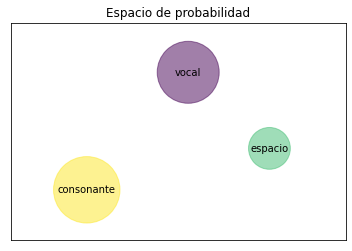

In [183]:
np.random.seed(10)   
burbujas_espacio_probabilidad(Ley_P_tipo_letra['tipo'],
                              Ley_P_tipo_letra['probabilidad'])

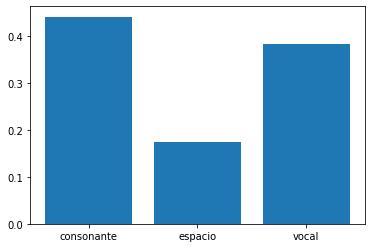

In [184]:
plt.bar(Ley_P_tipo_letra['tipo'], Ley_P_tipo_letra['probabilidad'] )
plt.show()

¿Cómo calcular la esperanza matemática y varianza de la distribución de probabilidad del tipo de caracteres en 100 años de soledad?


## Tarea

1. Genere la ley de probabilidad de las siguientes variables aleatorias:

  - El número que puede salir en la [ruleta francesa](https://es.wikipedia.org/wiki/Ruleta#/media/Archivo:Roulette_frz.png) (sólo tienen un cero)
  - El color que puede salir en la ruleta francesa

  - Ganancia al apostar a un número concreto (si gana obtiene 35 veces lo apostado, suponga que la apuesta es de $1)


2. Evalue si los siguientes eventos son dependientes o independientes

   - A : obtener un numero par que no sea cero,
   - B : que sea color rojo

3. Calcule la probabilidad condicional de obtener un número par dado que salió el color rojo P(A|B) 

4. Calcule la probabilidad condicional de que el número sea rojo, dado que salio un par P(A|B)

5. Calcula la esperanza matemática de la variable:
 - X = fichas ganadas al apostar 1 al número 28

6. Simular 10 juegos de ruleta haciendo la misma apuesta, calcular el promedio de las ganancias y explicar las diferencias
